In [1]:
import sys
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
from pathlib import Path

# Get the absolute path of the current file
current_file_path = Path('nn_model.py').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))

from data.input_data import DatasetCreator

# Step 1: Create Datasets
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
circles_dataset = dataset_creator.create_make_circles_dataset()

# Step 2: Split Data into Training, Validation, and Test Sets
# For Blob Dataset
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

# Split blob dataset into training and temporary (remaining) data
X_blob_train_temp, X_blob_test, y_blob_train_temp, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,
                                                                                  random_state=42)
# Further split the temporary data into training and validation sets
X_blob_train, X_blob_val, y_blob_train, y_blob_val = train_test_split(X_blob_train_temp, y_blob_train_temp,
                                                                      test_size=0.25, random_state=42)

# Split circles dataset into training and temporary (remaining) data
X_circles_train_temp, X_circles_test, y_circles_train_temp, y_circles_test = train_test_split(X_circles, y_circles,
                                                                                              test_size=0.2,
                                                                                              random_state=42)
# Further split the temporary data into training and validation sets
X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(X_circles_train_temp,
                                                                                  y_circles_train_temp, test_size=0.25,
                                                                                  random_state=42)

# Dimensions of each set
print(
    f"Blob Dataset:\nTrain set: {X_blob_train.shape}, Validation set: {X_blob_val.shape}, Test set: {X_blob_test.shape}")
print(
    f"Circles Dataset:\nTrain set: {X_circles_train.shape}, Validation set: {X_circles_val.shape}, Test set: {X_circles_test.shape}")


Blob Dataset:
Train set: (660, 2), Validation set: (220, 2), Test set: (220, 2)
Circles Dataset:
Train set: (300, 2), Validation set: (100, 2), Test set: (100, 2)


In [2]:
# Step 3: Scale Data
scaler_blob = StandardScaler().fit(X_blob_train)
X_blob_train_scaled = scaler_blob.transform(X_blob_train)
X_blob_val_scaled = scaler_blob.transform(X_blob_val)
X_blob_test_scaled = scaler_blob.transform(X_blob_test)

scaler_circles = StandardScaler().fit(X_circles_train)
X_circles_train_scaled = scaler_circles.transform(X_circles_train)
X_circles_val_scaled = scaler_circles.transform(X_circles_val)
X_circles_test_scaled = scaler_circles.transform(X_circles_test)

In [3]:
# Step 4: Define MLP architectures and perform GridSearchCV
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 50), (50, 100), (100, 100)]
param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'early_stopping': [True]
}


# Function to perform GridSearch and evaluate the model
def evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, param_grid):
    clf = GridSearchCV(MLPClassifier(max_iter=200), param_grid, n_jobs=-1, cv=3)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_

    print(f"Best parameters found: {clf.best_params_}")

    train_loss = best_model.loss_curve_[0], best_model.loss_curve_[-1]
    val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    print(f"Training Loss (first, last): {train_loss}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    return best_model


# Evaluate models on both datasets
print("\nEvaluating models on Blob Dataset")
best_model_blob = evaluate_model(X_blob_train_scaled, y_blob_train, X_blob_val_scaled, y_blob_val, X_blob_test_scaled, y_blob_test, param_grid)

print("\nEvaluating models on Circles Dataset")
best_model_circles = evaluate_model(X_circles_train_scaled, y_circles_train, X_circles_val_scaled, y_circles_val, X_circles_test_scaled, y_circles_test, param_grid)




Evaluating models on Blob Dataset
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Training Loss (first, last): (0.678537362874321, 0.2853952930535945)
Validation Accuracy: 0.9090909090909091
Test Accuracy: 0.9272727272727272

Evaluating models on Circles Dataset
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Training Loss (first, last): (0.6835692765358504, 0.33260293209112674)
Validation Accuracy: 0.95
Test Accuracy: 0.95


In [4]:
### Predictions on Test Sets:
# Use the best models to make predictions on the test datasets and print the results.
# Make predictions on the test sets using the best models
blob_test_predictions = best_model_blob.predict(X_blob_test_scaled)
circles_test_predictions = best_model_circles.predict(X_circles_test_scaled)

# Print predictions
print("\nBlob Dataset Test Predictions:")
print(blob_test_predictions)

print("\nCircles Dataset Test Predictions:")
print(circles_test_predictions)


Blob Dataset Test Predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Circles Dataset Test Predictions:
[0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0]


In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


Blob Dataset Evaluation:
Accuracy: 0.9272727272727272
Confusion Matrix:
[[204   0]
 [ 16   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.704656862745098


/Users/ndungajr/PycharmProjects/hw05/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


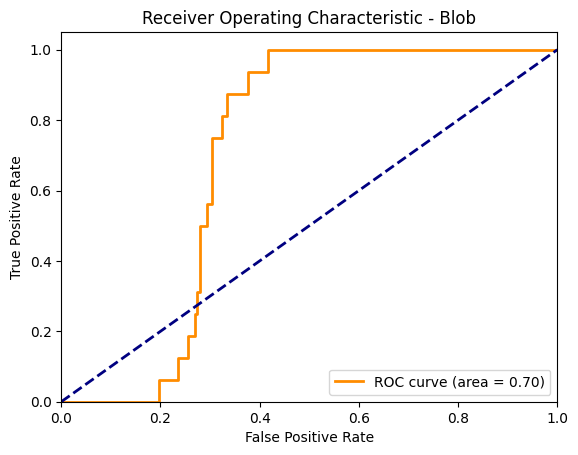


Circles Dataset Evaluation:
Accuracy: 0.95
Confusion Matrix:
[[46  0]
 [ 5 49]]
Precision: 1.0
Recall: 0.9074074074074074
F1 Score: 0.9514563106796117
AUC: 1.0


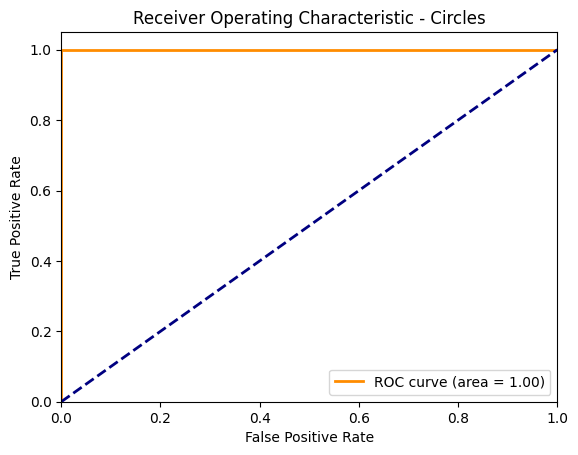

In [6]:
# Function to evaluate and print detailed metrics
def print_evaluation_metrics(model, X_test, y_test, dataset_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n{dataset_name} Dataset Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate models on both test datasets
print_evaluation_metrics(best_model_blob, X_blob_test_scaled, y_blob_test, "Blob")
print_evaluation_metrics(best_model_circles, X_circles_test_scaled, y_circles_test, "Circles")

To create an ensemble using the best neural network models identified in the previous stages, we can use a voting classifier. The VotingClassifier in scikit-learn allows us to combine different models to improve performance

### Explanation

1. **Ensemble Voting Classifier**: A VotingClassifier is created, combining the best models from the blob and circles datasets.
2. **Training the Ensemble**: The combined training data from both datasets is used to train the voting classifier.
3. **Evaluation**: The ensemble model is evaluated on a combined test set and individually on the blob and circles test

In [7]:
from sklearn.ensemble import VotingClassifier


Ensemble Voting Dataset Evaluation:
Accuracy: 0.78125
Confusion Matrix:
[[250   0]
 [ 70   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.8432


/Users/ndungajr/PycharmProjects/hw05/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


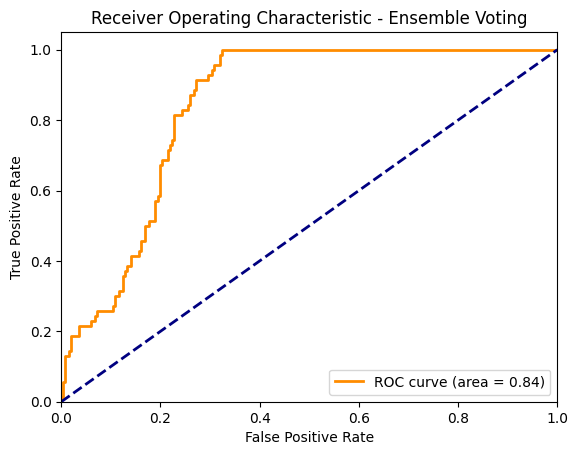

/Users/ndungajr/PycharmProjects/hw05/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Blob Ensemble Voting Dataset Evaluation:
Accuracy: 0.9272727272727272
Confusion Matrix:
[[204   0]
 [ 16   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.970281862745098


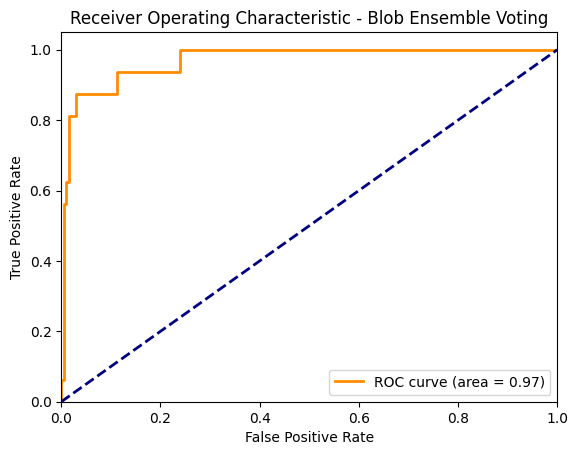

In [8]:
# Step 5: Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('mlp_blob', best_model_blob),
    ('mlp_circles', best_model_circles)
], voting='soft', n_jobs=-1)

# Train the voting classifier
X_train_combined = np.vstack((X_blob_train_scaled, X_circles_train_scaled))
y_train_combined = np.hstack((y_blob_train, y_circles_train))
voting_clf.fit(X_train_combined, y_train_combined)

# Evaluate the ensemble model
X_test_combined = np.vstack((X_blob_test_scaled, X_circles_test_scaled))
y_test_combined = np.hstack((y_blob_test, y_circles_test))

print_evaluation_metrics(voting_clf, X_test_combined, y_test_combined, "Ensemble Voting")

# Predictions on individual test sets
print_evaluation_metrics(voting_clf, X_blob_test_scaled, y_blob_test, "Blob Ensemble Voting")


/Users/ndungajr/PycharmProjects/hw05/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Circles Ensemble Voting Dataset Evaluation:
Accuracy: 0.46
Confusion Matrix:
[[46  0]
 [54  0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.8715780998389695


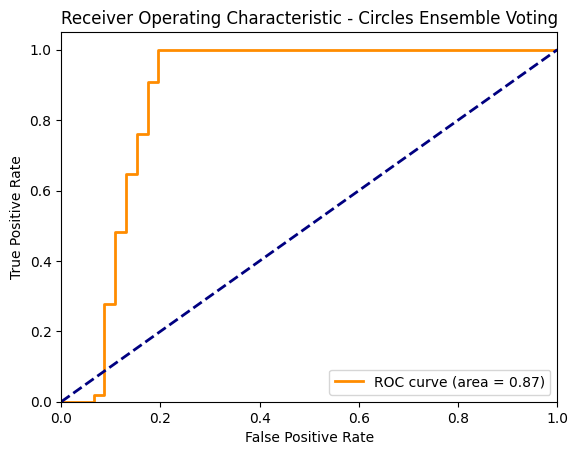

In [9]:
print_evaluation_metrics(voting_clf, X_circles_test_scaled, y_circles_test, "Circles Ensemble Voting")